# Housing Market Segmentation using Unsupervised Learning

**GitHub Repository**: [View Project on GitHub](https://github.com/m-fatih/Unsupervised-Learning-Final-Project)


## Problem Description
In this project, I'll explore the Ames Housing Dataset to find out patterns in residential properties using **unsupervised learning techniques**. Unlike traditional regression tasks that predict house prices, our goal is to segment houses into distinct groups based on shared characteristics like size, quality, age, and other features.

This is a **clustering problem**. We apply clustering algorithms such as **KMeans** and **Agglomerative Clustering** to identify patterns and groupings in the data that might correspond to different types of houses such as luxury homes, budget properties, or starter homes.

## Project Goal
- Discover and interpret **clusters of similar** houses based on their physical and categorical attributes.
- Provide insights that can help **real estate analysts**, **buyers**, or **planners** better understand the structure of the housing market in Ames, Iowa.
- Demonstrate the power of unsupervised learning for **market segmentation**, which can be extended to various real-world applications like customer segmentation, product categorization, or risk profiling.

By identifying these clusters, we aim to uncover natural groupings in the housing market that aren't directly observable from price alone.

## Dataset Source

The dataset used in this project is the [Ames Housing dataset](https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset), originally compiled by Dean De Cock and made publicly available on Kaggle. The data contains detailed characteristics of residential homes in Ames, Iowa.

> De Cock, D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project. *Journal of Statistics Education*, 19(3).

In [298]:
## Imports

import os
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

import kagglehub

In [299]:
path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")

In [300]:
df = pd.read_csv(os.path.join(path,  os.listdir(path)[0]))

## 1) Data Overview

In [302]:
df.shape, df.head()

((2930, 82),
    Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
 0      1  526301100           20        RL         141.0     31770   Pave   
 1      2  526350040           20        RH          80.0     11622   Pave   
 2      3  526351010           20        RL          81.0     14267   Pave   
 3      4  526353030           20        RL          93.0     11160   Pave   
 4      5  527105010           60        RL          74.0     13830   Pave   
 
   Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
 0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
 1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
 2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
 3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
 4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
 
   Misc Val Mo Sold Yr Sold Sale Type  Sale Con

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [304]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## 2) Data Cleaning

In [306]:
# Order and PID are Identifiers
# SalePrice is for supervised learning
unnecessary_cols = ['Order', 'PID', 'SalePrice']
df_clean = df.drop(columns=unnecessary_cols)

### Handle Missing Values

In [308]:
missing_df = df_clean.isnull().sum().sort_values(ascending=False)
missing_values = [i for i in missing_df.items() if i[1] > 0]

In [309]:
print("Columns with missing values:", len(missing_values))
missing_values

Columns with missing values: 27


[('Pool QC', 2917),
 ('Misc Feature', 2824),
 ('Alley', 2732),
 ('Fence', 2358),
 ('Mas Vnr Type', 1775),
 ('Fireplace Qu', 1422),
 ('Lot Frontage', 490),
 ('Garage Qual', 159),
 ('Garage Finish', 159),
 ('Garage Yr Blt', 159),
 ('Garage Cond', 159),
 ('Garage Type', 157),
 ('Bsmt Exposure', 83),
 ('BsmtFin Type 2', 81),
 ('Bsmt Cond', 80),
 ('Bsmt Qual', 80),
 ('BsmtFin Type 1', 80),
 ('Mas Vnr Area', 23),
 ('Bsmt Half Bath', 2),
 ('Bsmt Full Bath', 2),
 ('Garage Area', 1),
 ('Garage Cars', 1),
 ('Electrical', 1),
 ('Total Bsmt SF', 1),
 ('Bsmt Unf SF', 1),
 ('BsmtFin SF 2', 1),
 ('BsmtFin SF 1', 1)]

<Axes: title={'center': 'Missing Value Percentage'}>

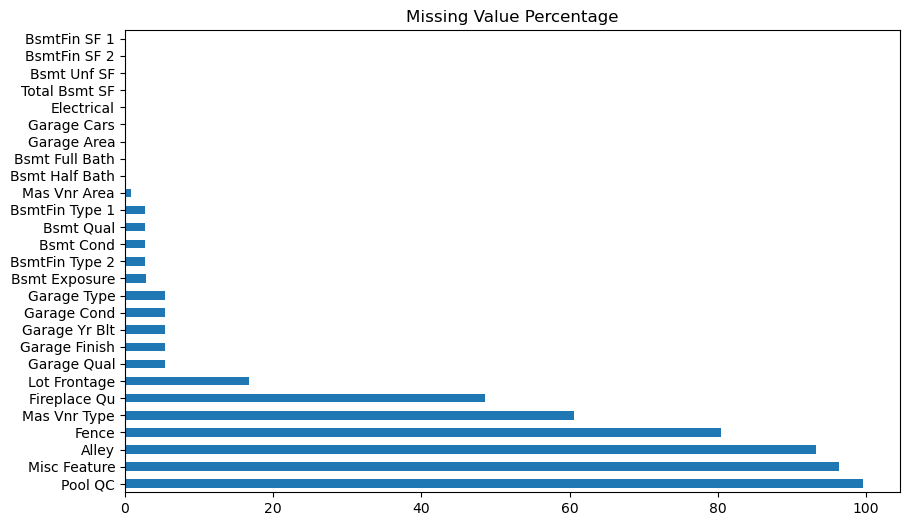

In [310]:
missing_percent = df_clean.isnull().mean().sort_values(ascending=False) * 100
missing_percent[missing_percent > 0].plot(kind='barh', figsize=(10, 6), title="Missing Value Percentage")

In [311]:
numeric_cols = df_clean.select_dtypes(exclude=['object']).columns
string_cols = df_clean.select_dtypes(include=['object']).columns
print("Numerical Columns:", len(numeric_cols))
print("Categorical Columns:", len(string_cols))

Numerical Columns: 36
Categorical Columns: 43


In [312]:
# Drop columns with > 80% missing values
near_empty_cols = [i[0] for i in df_clean.isnull().sum().items() if i[1] > (len(df) * 0.8)]
print(near_empty_cols)
df_clean = df_clean.drop(columns=near_empty_cols)

['Alley', 'Pool QC', 'Fence', 'Misc Feature']


In [313]:
# Check when the home built to compare similar homes' electrical value.
df_clean[df_clean['Electrical'].isna()][['Year Built', 'Electrical']]

,Year Built,Electrical
1577,2006,NaN


In [314]:
df_clean[df_clean['Year Built'] >= 1970]['Electrical'].value_counts(normalize=True)

Electrical
SBrkr    1.0
Name: proportion, dtype: float64

In [315]:
df_clean.loc[df_clean['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [316]:
garage_cols = [col for col in df_clean.columns if 'Garage' in col]
df_clean[df_clean['Garage Type'].isna()][garage_cols]
garage_cols_string = [col for col in garage_cols if col in string_cols]
garage_cols_numeric = [col for col in garage_cols if col in numeric_cols]

In [317]:
df_clean[df_clean['Garage Type'].isna()][garage_cols_string].isna().sum()

Garage Type      157
Garage Finish    157
Garage Qual      157
Garage Cond      157
dtype: int64

In [318]:
df_clean[df_clean['Garage Type'].isna()][garage_cols_numeric].isna().sum()

Garage Yr Blt    157
Garage Cars        0
Garage Area        0
dtype: int64

In [319]:
# Garage-related fields are imputed based on whether a garage exists. 
    # If not, string columns are filled with 'None' and numeric fields are set to '0'. 
# 'Garage Yr Blt' is imputed with the home's 'Year Built'.
mask = df_clean['Garage Type'].isna()
df_clean.loc[mask, garage_cols_string] = df_clean.loc[mask, garage_cols_string].fillna('None')
df_clean.loc[mask, garage_cols_numeric] = df_clean.loc[mask, garage_cols_numeric].fillna(0)

In [320]:
df_clean[df_clean['Garage Yr Blt'].isna()][garage_cols + ['Year Built']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Year Built
1356,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,1910
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,1923


In [321]:
mask = df_clean['Garage Yr Blt'].isna()
df_clean.loc[mask, 'Garage Yr Blt'] = df_clean.loc[mask, 'Year Built']

In [322]:
df_clean[df_clean['Garage Finish'].isna()][garage_cols + ['Year Built']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Year Built
1356,Detchd,1910.0,NaN,1.0,360.0,NaN,NaN,1910
2236,Detchd,1923.0,NaN,NaN,NaN,NaN,NaN,1923


In [323]:
old_house_mask = (df_clean['Year Built'] < 1930) & (df_clean['Garage Type'] == 'Detchd')
reference_df = df_clean[old_house_mask & df_clean[garage_cols].notnull().all(axis=1)]

fill_values_old_detached = {}
for col in garage_cols:
    if reference_df[col].dtype == 'object':
        fill_values_old_detached[col] = reference_df[col].mode()[0]
    else:
        fill_values_old_detached[col] = reference_df[col].median()
fill_values_old_detached

{'Garage Type': 'Detchd',
 'Garage Yr Blt': 1934.0,
 'Garage Finish': 'Unf',
 'Garage Cars': 1.0,
 'Garage Area': 342.0,
 'Garage Qual': 'TA',
 'Garage Cond': 'TA'}

In [324]:
mask = df_clean['Garage Finish'].isna()
for col, value in fill_values_old_detached.items():
    df_clean.loc[mask & df_clean[col].isna(), col] = value

In [325]:
bsmt_cols = [col for col in df_clean.columns if 'Bsmt' in col]
df_clean[df_clean['Bsmt Full Bath'].isna()][bsmt_cols]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [326]:
# Basement fields are handled using context-aware imputations. 
# For example, if 'Bsmt Full Bath' is missing, we assume the record is incomplete and drop it. 
# Other features like 'Bsmt Exposure' and 'BsmtFin Type 2' are filled based on similar home characteristics.
df_clean.dropna(subset=['Bsmt Full Bath'], inplace=True)

In [327]:
df_clean[(df_clean['BsmtFin Type 2'].isna()) & (df_clean['BsmtFin Type 1'].notna())][bsmt_cols + ['Year Built']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Year Built
444,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0,2003


In [328]:
df_clean[(df_clean['BsmtFin SF 2'] > 200) & (df_clean['Year Built'] >= 2000)].groupby(['BsmtFin Type 1','BsmtFin Type 2']).size()

BsmtFin Type 1  BsmtFin Type 2
ALQ             BLQ               1
BLQ             GLQ               1
                Rec               1
GLQ             ALQ               5
                BLQ               1
                LwQ               1
dtype: int64

In [329]:
df_clean.loc[(df_clean['BsmtFin Type 2'].isna()) & (df_clean['BsmtFin Type 1'].notna()), 'BsmtFin Type 2'] = 'ALQ'

In [330]:
df_clean[(df_clean['Bsmt Exposure'].isna()) & (df_clean['Bsmt Qual'].notna())][bsmt_cols + ['Year Built']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Year Built
66,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0,2005
1796,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0,2007
2779,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0,2002


In [331]:
df_clean[(df_clean['BsmtFin Type 1'] == 'Unf')].groupby(['Bsmt Exposure']).size()

Bsmt Exposure
Av     83
Gd     22
Mn     57
No    686
dtype: int64

In [332]:
df_clean.loc[(df_clean['Bsmt Exposure'].isna()) & (df_clean['Bsmt Qual'].notna()), 'Bsmt Exposure'] = 'No'

In [333]:
df_clean[(df_clean['Bsmt Exposure'].isna())][bsmt_cols + ['Year Built']].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Year Built
83,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1978
154,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1955
206,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1930
243,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1946
273,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1945


In [334]:
mask = df_clean['Bsmt Exposure'].isna()
bsmt_cols_string = [col for col in bsmt_cols if col in string_cols]
df_clean.loc[mask, bsmt_cols_string] = df_clean.loc[mask, bsmt_cols_string].fillna('None')

In [335]:
df_clean.groupby(['Bsmt Exposure']).size()

Bsmt Exposure
Av       418
Gd       284
Mn       239
No      1909
None      78
dtype: int64

In [336]:
df_clean.loc[df_clean['Mas Vnr Type'].isna(), 'Mas Vnr Area'] = 0
df_clean.loc[df_clean['Mas Vnr Type'].isna(), 'Mas Vnr Type'] = 'None'

In [337]:
df_clean['Lot Frontage'] = df_clean.groupby(['Neighborhood', 'Lot Config'])['Lot Frontage'].transform(
    lambda x: x.fillna(x.median())
)
print(df_clean[df_clean['Lot Frontage'].isna()][['Lot Frontage', 'Lot Area', 'Lot Shape', 'Lot Config', 'Total Bsmt SF']])

      Lot Frontage  Lot Area Lot Shape Lot Config  Total Bsmt SF
1007           NaN     14067       Reg        FR3          836.0
1032           NaN     14311       IR1        FR3         1236.0
2256           NaN      9763       IR1     Inside         1502.0
2346           NaN     10464       IR1        FR3          988.0
2440           NaN     12104       IR1        FR3         1035.0
2788           NaN      3612       IR1     Inside          630.0
2892           NaN      8239       IR1     Inside            0.0


In [338]:
df_clean['Lot Frontage'] = df_clean.groupby('Lot Config')['Lot Frontage'].transform(
    lambda x: x.fillna(x.median())
)

In [339]:
df_clean[(df_clean['Fireplace Qu'].isna())].groupby(['Fireplaces']).size()

Fireplaces
0    1421
dtype: int64

In [340]:
df_clean.loc[df_clean['Fireplace Qu'].isna(), 'Fireplace Qu'] = 'None'

In [341]:
print("Remaining missing values:", df_clean.isnull().sum().sum())

Remaining missing values: 0


### Feature Engineering

To simplify modeling and improve interpretability, I created new features such as:
- 'House_Age': Current year minus year built
- 'Years_Since_Remodel': Captures how recently the house was updated
- 'Total_SF': Combines basement and floor space
- 'Total_Bathrooms': Sums full and half baths, weighted appropriately
- 'Has_Pool': Encodes pool presence as binary

In [344]:
current_year = datetime.datetime.now().year
df_clean['House_Age'] = current_year - df_clean['Year Built']
df_clean['Years_Since_Remodel'] = current_year - df_clean['Year Remod/Add']
df_clean['Total_SF'] = df_clean['Total Bsmt SF'] + df_clean['1st Flr SF'] + df_clean['2nd Flr SF']
df_clean['Total_Bathrooms'] = df_clean['Full Bath'] + 0.5*df_clean['Half Bath'] + df_clean['Bsmt Full Bath'] + 0.5*df_clean['Bsmt Half Bath']
df_clean['Has_Pool'] = (df_clean['Pool Area'] > 0).astype(int)

updated_cols = [
    'Year Built', 'Year Remod/Add', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 
    'Full Bath', 'Half Bath','Bsmt Full Bath', 'Bsmt Half Bath', 'Pool Area'
]

df_clean = df_clean.drop(columns=updated_cols)

### Encode Categorical Variables

In [346]:
numeric_cols = [col for col in numeric_cols if col in df_clean.columns]
string_cols = [col for col in string_cols if col in df_clean.columns]
print("Numerical Columns:", len(numeric_cols))
print("Categorical Columns:", len(string_cols))

Numerical Columns: 26
Categorical Columns: 39


In [347]:
quality_cols = []
qual_map = {'Ex': 5, 'Gd': 4, 'Av': 3, 'TA': 3, 'Mn': 2, 'Fa': 2, 'Po': 1, 'No': 1, 'None': 0}
quality_values = set(k for k in qual_map.keys() if k != 'None')
for col in string_cols:
    unique_vals = set(df_clean[col].dropna().unique())
    if quality_values & unique_vals:  # if there's any intersection
        quality_cols.append(col)
print(quality_cols)
for col in quality_cols:
    df_clean[col] = df_clean[col].map(qual_map)

['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond']


In [348]:
remaining_string_cols = [col for col in string_cols if col not in quality_cols]

In [349]:
df_encoded = pd.get_dummies(df_clean, columns=remaining_string_cols, drop_first=True)

In [350]:
df_encoded.shape, df_encoded.columns

((2928, 221),
 Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
        'Overall Cond', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Bsmt Qual',
        'Bsmt Cond',
        ...
        'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
        'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
        'Sale Condition_Family', 'Sale Condition_Normal',
        'Sale Condition_Partial'],
       dtype='object', length=221))

### Scale Numerical Features

In [352]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

df_scaled.shape, df_scaled.head()

((2928, 221),
    MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
 0    -0.877535      3.238212  2.755306     -0.068035     -0.505952   
 1    -0.877535      0.492682  0.189166     -0.776958      0.394064   
 2    -0.877535      0.537691  0.526045     -0.068035      0.394064   
 3    -0.877535      1.077795  0.130323      0.640888     -0.505952   
 4     0.060681      0.222630  0.470386     -0.776958     -0.505952   
 
    Mas Vnr Area  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  ...  \
 0      0.063045   -0.687388   -0.229674  -0.534765   1.894023  ...   
 1     -0.564335   -0.687388   -0.229674  -0.534765   0.132365  ...   
 2      0.040638   -0.687388   -0.229674  -0.534765   0.132365  ...   
 3     -0.564335    1.035790   -0.229674  -0.534765   0.132365  ...   
 4     -0.564335   -0.687388   -0.229674   0.576514   0.132365  ...   
 
    Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
 0        -0.052342      -0.298129      -0.048953      -0.0184

### Data Cleaning Summary

The dataset contained several missing values across features like Lot Frontage, Mas Vnr Area, Fireplace Qu, and various basement-related and garage-related columns. These were addressed through a combination of:

    Domain-informed imputations (e.g., using Year Built to fill Garage Yr Blt, or setting Mas Vnr Area = 0 if type was None)

    Ordinal mapping of quality scores (e.g., Ex to Po mapped from 5 to 1)

    Dropping low-utility columns such as Utilities, Alley, and Misc Feature due to high missingness or redundancy

I also engineered helpful features such as:

    House_Age, Years_Since_Remodel, Total_SF, Total_Bathrooms, and Log SalePrice (coming up shortly)

Finally, categorical variables were encoded using a mix of ordinal encoding (where applicable) and one-hot encoding, and all features were scaled using StandardScaler to prepare the dataset for clustering.

The data is now in a clean, analysis-ready state, enabling meaningful EDA and unsupervised modeling.

## 3) Exploratory Data Analysis (EDA)

### Correlation Matrix

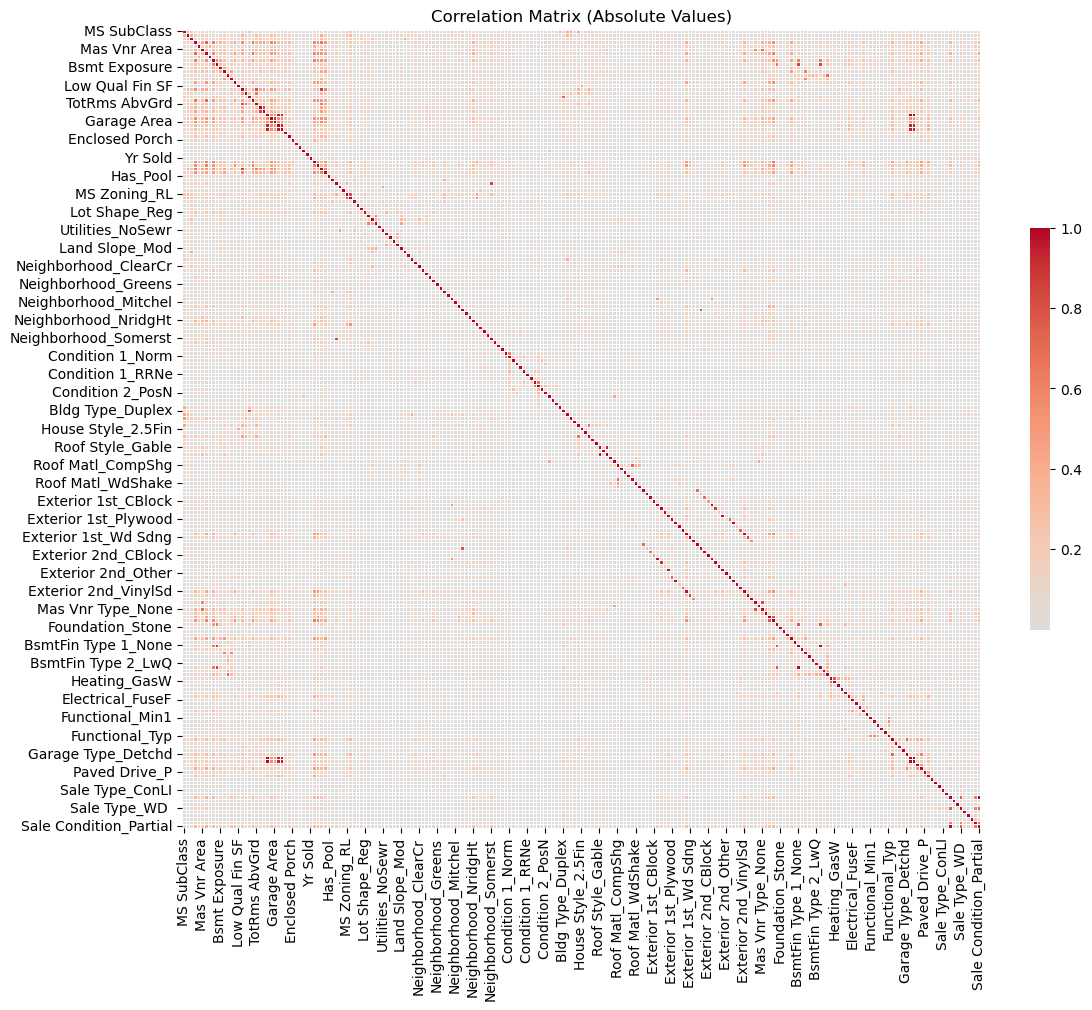

In [356]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_scaled.corr().abs().clip(upper=1), cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (Absolute Values)")
plt.tight_layout()
plt.show()

- Bright blocks show strong correlations between features
- Likely strong clusters:
    - **Garage Area** vs **Garage Cars**
    - **Total_SF** vs **Gr Liv Area**
    - Engineered features like **Total_Bathrooms** and **Total_SF** are highly informative

### Histograms (w/ KDE curves)

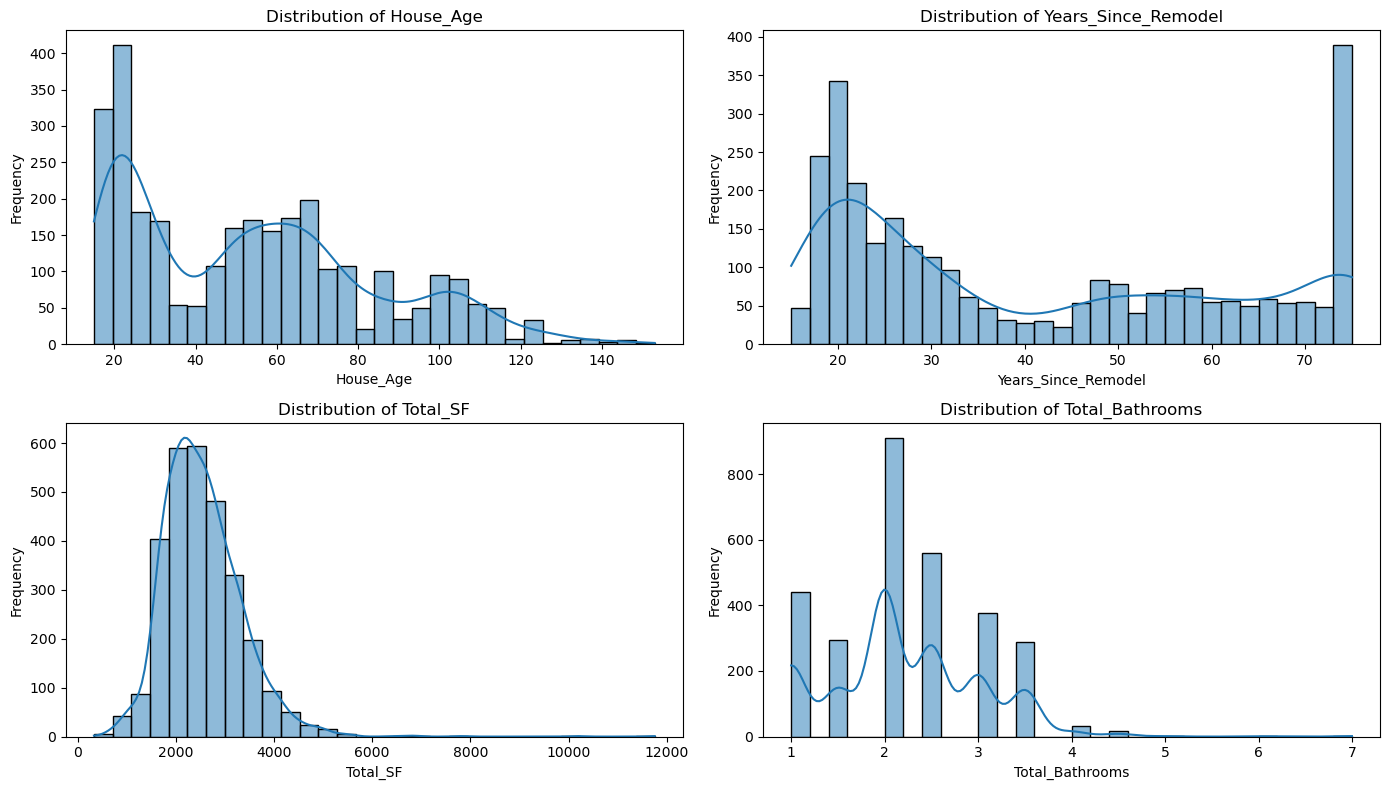

In [359]:
key_features = ['House_Age', 'Years_Since_Remodel', 'Total_SF', 'Total_Bathrooms']

plt.figure(figsize=(14, 8))
for i, col in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

- **House_Age** is right-skewed meaning many newer homes, fewer very old ones.
- **Years_Since_Remodel** shows spikes at 0 (recently remodeled), and other common values (like 10, 20).
- **Total_SF** is right-skewed which makes sense, larger homes are rarer.
- **Total_Bathrooms** has discrete jumps which is consistent with 0.5 increments (due to half baths).

It tells us the clustering may pick up:
- New vs. old homes
- Large vs. small homes
- Recently remodeled vs. not

### PCA Plot

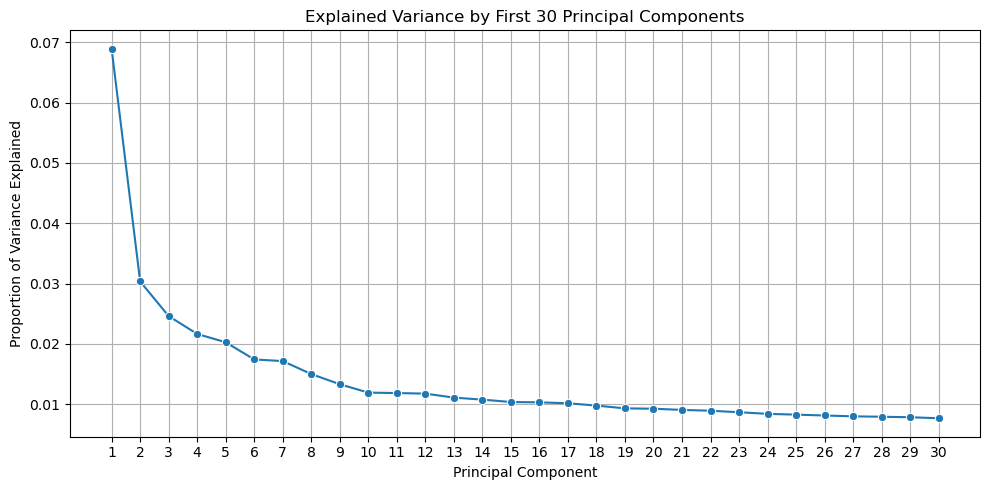

In [362]:
pca = PCA()
pca.fit(df_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot
n_components_display = 30
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, n_components_display + 1),
             y=explained_variance_ratio[:n_components_display],
             marker='o')
plt.title('Explained Variance by First 30 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, n_components_display + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

- First few components (PC1–PC5) explain a large chunk of the variance.
- After PC10, the curve flattens, meaning diminishing returns from additional components.
- This justifies reducing dimensions to ~10–15 components before clustering if you want faster performance without losing much information.

## 4) Modeling

### KMeans Clustering

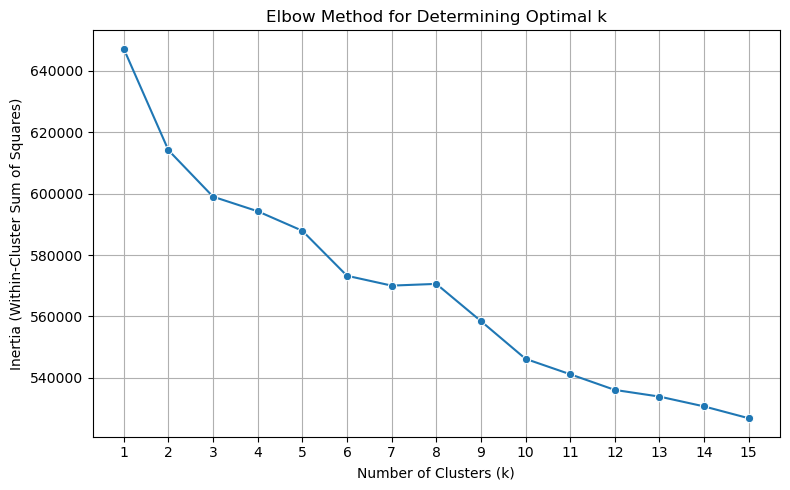

In [366]:
# Trying different values of k to find the elbow point
inertia = []
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_range, y=inertia, marker='o')
plt.title("Elbow Method for Determining Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

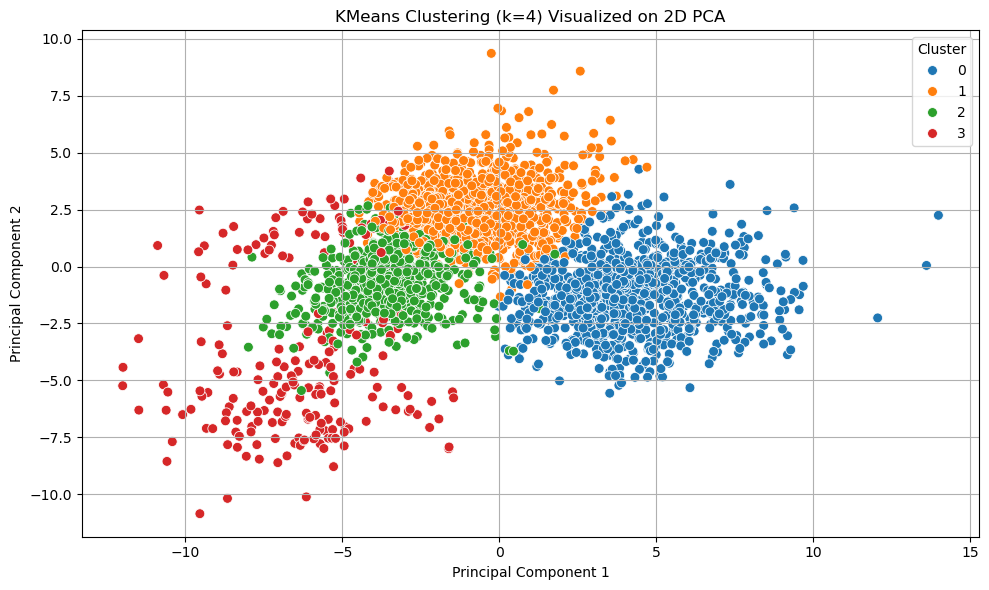

In [367]:
# Run KMeans with k=4

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(df_scaled)

# Add cluster labels to PCA DataFrame for plotting
pca_df['KMeans_Cluster'] = kmeans_labels

# Plot the clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='tab10', s=50)
plt.title('KMeans Clustering (k=4) Visualized on 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

The KMeans clustering model with k = 4 successfully grouped the housing data into four well-separated clusters, as visualized in the 2D PCA projection.

Key observations:
- The clusters are clearly separated and well-formed, suggesting that KMeans effectively captured latent structure in the housing features.
- There is a good mix of dense and dispersed clusters, which indicates the presence of meaningful subgroups such as homes that differ in size, age, or quality.
- These results establish a strong foundation for the next step: interpreting cluster profiles based on features like House_Age, Total_SF, and Total_Bathrooms.

### Agglomerative Clustering

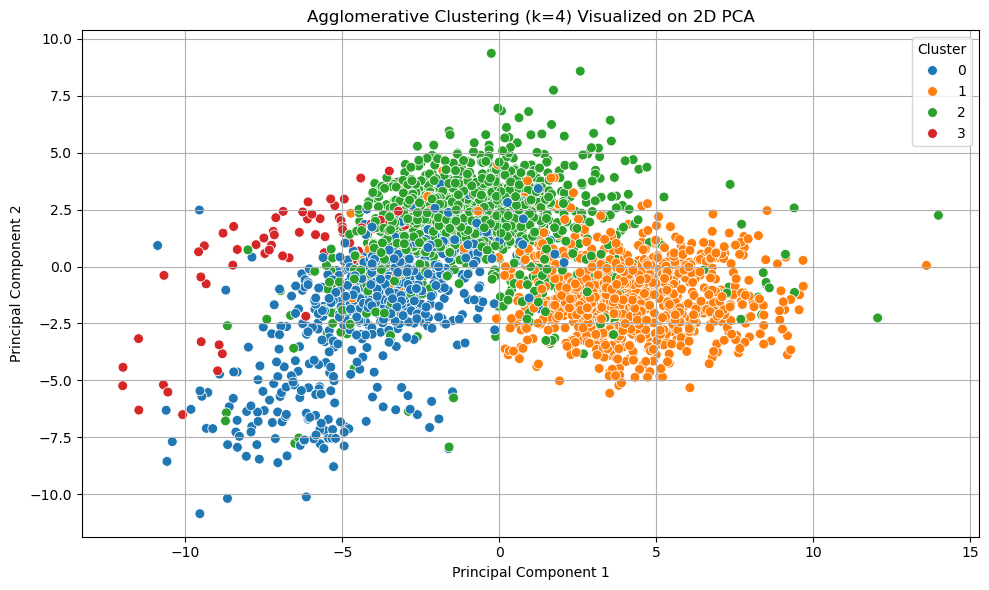

In [370]:
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(df_scaled)

pca_df['Agglo_Cluster'] = agglo_labels

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Agglo_Cluster', palette='tab10', s=50)
plt.title('Agglomerative Clustering (k=4) Visualized on 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

The Agglomerative Clustering model, configured to form 4 clusters, grouped the housing data into visually coherent and overlapping regions in the 2D PCA space.

Key observations:
- The clusters are well-defined but exhibit softer boundaries, suggesting that Agglomerative Clustering captures more gradual transitions between different housing groups.
- Compared to KMeans, the cluster edges appear more blended, reflecting the hierarchical nature of the algorithm, which merges observations based on proximity rather than optimizing for compactness.
- Despite these differences, the overall cluster structure is consistent with KMeans — reinforcing the validity of the identified groupings across multiple unsupervised methods.
- This model offers an alternative view that may better represent continuity or progression in housing features, making it valuable for interpreting nuanced transitions (e.g., from starter homes to luxury properties).

### Comparison: KMeans vs. Agglomerative Clustering

Both KMeans and Agglomerative Clustering were applied with k = 4 to identify housing segments based on scaled and engineered features. Though similar in the broad sense, the methods differ in visions behind clusters in the structure of data.
Similarities:
- Both models produced stable and interpretable clusters, confirming that there are natural groupings within the Ames Housing dataset.
- Both tend to show similar spatial distribution of clusters in the 2D PCA space with common high-density and outlier segments.
- In both cases, the clusters appear meaningful and ready for feature-based interpretation (e.g., differences in square footage, age, bathrooms, etc.).

Differences:
- KMeans produced crisper, more compact clusters, which aligns with its objective of minimizing within-cluster variance and assuming spherical cluster shapes.
- Agglomerative Clustering, on the other hand, created softer and more blended cluster boundaries, indicating a more nuanced grouping that may capture gradual transitions.
- KMeans relies on random initialization (though we used a fixed seed), whereas Agglomerative is deterministic, resulting in reproducible groupings without needing random seeds.

Using multiple clustering models increases confidence in the results and provides different lenses for interpretation. While KMeans offers clarity and efficiency, Agglomerative Clustering adds depth by highlighting smooth shifts between home types both of which are valuable in exploring housing market segmentation.

## 5) Results and Analysis

In [375]:
df_clean['KMeans_Cluster'] = kmeans_labels

# Key features to compare across clusters
features_to_summarize = ['House_Age', 'Total_SF', 'Total_Bathrooms', 'Overall Qual', 'Garage Cars']

# Cluster-wise averages
cluster_summary = df_clean.groupby('KMeans_Cluster')[features_to_summarize].mean().round(2)

In [376]:
cluster_summary

,House_Age,Total_SF,Total_Bathrooms,Overall Qual,Garage Cars
KMeans_Cluster,,,,,
0,23.22,3039.17,2.80,7.35,2.33
1,57.70,2447.77,2.09,5.63,1.67
2,90.60,2134.95,1.61,5.28,1.43
3,77.17,1792.64,1.72,4.55,0.47


After applying KMeans with k=4, we examined average values of key features such as House_Age, Total_SF, Total_Bathrooms, Overall Qual, and Garage Cars. The resulting clusters appear to represent distinct segments of the housing market:

- **Cluster 0**: *Modern, spacious homes*
    - Average Age: ~23 years
    - Large Homes: ~3039 SF w/ highest Bathroom Count: ~2.8
    - Highest Overall Quality: ~7.3 & Garage Capacity: ~2.3
- **Cluster 1**: *Mid-age family homes*
    - Average Age: ~58 years
    - Moderate Size: ~2450 SF w/ high Bathroom: ~2.1 and Garage Capacity: ~1.67
    - Above-average Overall Quality ~5.6

- **Cluster 2**: *Old but roomy homes*
    - Oldest Group: ~91 years
    - Home Size: ~2135 SF w/ lowest Bathroom Count: ~1.6 and Garage Capacity: ~1.43
    - Slightly above-average Overall Quality: ~5.3n
- **Cluster 4**: *Historic or modest homes*
    - Average group: ~77 years
    - Smallest Homes: ~1800 SF w/, lower Bathroom Count: ~1.7 and lowest Garage Capacity: ~0.5
    - Lowest Overall Quality rating: ~4.55

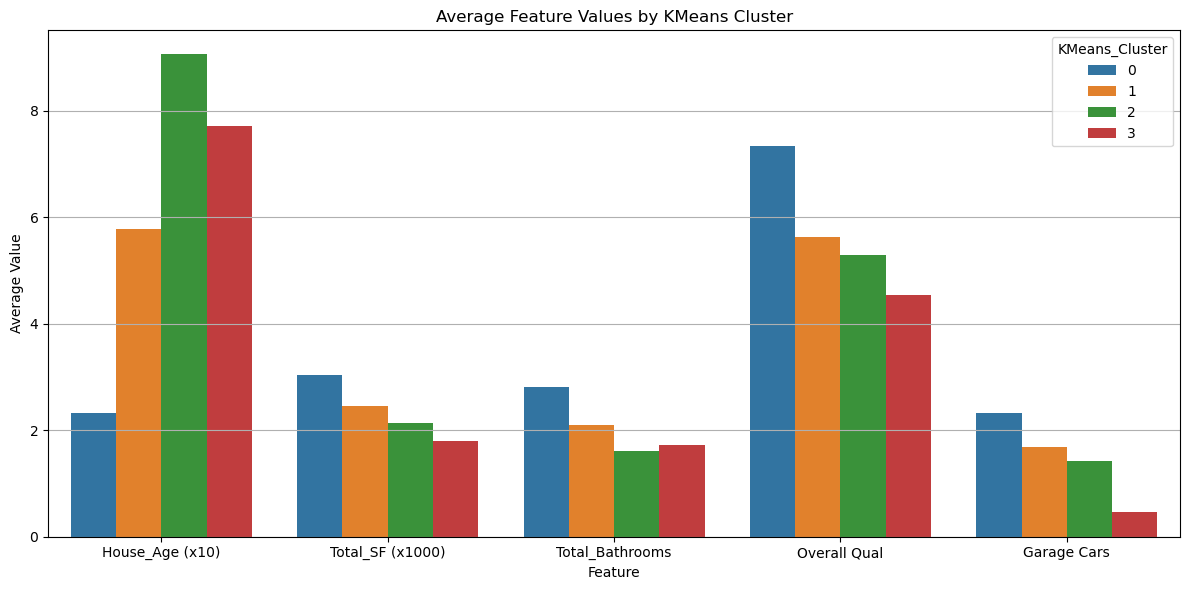

In [378]:
df_clean['Total_SF (x1000)'] = df_clean['Total_SF'] / 1000

df_clean['House_Age (x10)'] = df_clean['House_Age'] / 10

scaled_summary = df_clean.groupby('KMeans_Cluster')[
    ['House_Age (x10)', 'Total_SF (x1000)', 'Total_Bathrooms', 'Overall Qual', 'Garage Cars']
].mean().copy()

cluster_summary_long_scaled = scaled_summary.reset_index().melt(
    id_vars='KMeans_Cluster', var_name='Feature', value_name='Average'
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_summary_long_scaled, x='Feature', y='Average', hue='KMeans_Cluster', palette='tab10')
plt.title('Average Feature Values by KMeans Cluster')
plt.ylabel('Average Value')
plt.xlabel('Feature')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Cluster 0 represents newer, high-quality homes with large square footage and strong garage/bathroom capacity which is one of the most spacious and desirable segments.
- Cluster 1 includes mid-aged, moderately large homes with decent features, a balance between affordability and comfort.
- Cluster 2 contains the oldest homes overall, yet still reasonably sized. While not top-tier in quality or amenities, these homes retain some value through space.
- Cluster 3 consistently ranks lowest across most features, suggesting modest or historic homes with minimal garage capacity and older construction.

## 6) Discussion and Conclusion

This project aimed to segment residential properties in the Ames Housing dataset using unsupervised learning techniques, revealing underlying patterns in housing characteristics that go beyond sale price or predefined labels.

***Key Takeaways***
- Meaningful clusters emerged from the data, distinguishing properties by traits such as age, size, number of bathrooms, and overall quality.
- Feature engineering (like Total_SF, Total_Bathrooms, and House_Age) was essential for enabling clear segmentation.
- KMeans and Agglomerative Clustering produced consistent patterns, indicating that the housing market naturally divides into interpretable groups even without supervised labels.
- PCA helped visualize clusters in 2D space and assess variance contribution which is crucial for understanding high-dimensional structure.

***What Didn’t Work***
- KMeans assumes spherical clusters, which might oversimplify real-world housing variation (e.g., overlapping styles or transitional neighborhoods).
- Some clusters showed soft boundaries, especially in Agglomerative Clustering which indicates that housing types may lie on a continuum rather than fall into hard categories.
- PCA dimensionality reduction can lead to information loss and doesn’t capture nonlinear structure.

***Suggestions for Future Work***
- Try DBSCAN or UMAP to uncover non-linear cluster shapes or detect noise/outliers.
- Incorporate geographic features (e.g., neighborhood coordinates) to better reflect location-based clustering.
- Use clustering results as features in a downstream supervised task (e.g., price prediction or housing recommendation).
- Consider building an interactive dashboard to visualize clusters by neighborhood, age, or size.